In [16]:
print("\n\n\n**************************\n")
print("Titre du projet : Projet de Scraping des Données NBA 2023\n")
print("Wissem Sahli\n")
print("**************************\n\n\n")

print("Introduction :\n")
print("Le projet consiste à extraire et analyser les statistiques des joueurs NBA pour la saison 2023 en")
print("utilisant le web scraping. Nous avons extrait des données depuis le site Basketball Reference pour")
print("en faire des visualisations significatives et comprendre les performances des joueurs durant cette")
print("saison. Nous avons utilisé les bibliothèques Python telles que BeautifulSoup et requests pour le scraping,")
print("pandas pour la manipulation des données et matplotlib/seaborn/plotly pour la création des visualisations.\n")




**************************

Titre du projet : Projet de Scraping des Données NBA 2023

Wissem Sahli

**************************



Introduction :

Le projet consiste à extraire et analyser les statistiques des joueurs NBA pour la saison 2023 en
utilisant le web scraping. Nous avons extrait des données depuis le site Basketball Reference pour
en faire des visualisations significatives et comprendre les performances des joueurs durant cette
saison. Nous avons utilisé les bibliothèques Python telles que BeautifulSoup et requests pour le scraping,
pandas pour la manipulation des données et matplotlib/seaborn/plotly pour la création des visualisations.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from bs4 import BeautifulSoup
import requests
import warnings
import numpy as np
warnings.filterwarnings('ignore')

print("\n******************************")
print("   Installation des packages")
print("******************************")
print("\nLes packages suivants sont nécessaires :")
print(" - pandas")
print(" - matplotlib")
print(" - seaborn")
print(" - plotly")
print(" - beautifulsoup4")
print(" - requests")
print("\nSi vous ne les avez pas, installez-les avec: pip install pandas matplotlib seaborn plotly beautifulsoup4 requests")
print("--------------------------------")

# URL for scraping
url = "https://www.basketball-reference.com/leagues/NBA_2023_per_game.html"

# Read the HTML page
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

# Extract player statistics table
table = soup.find('table')
if table is None:
    raise ValueError("No table found on the webpage. Please check the URL or the webpage structure.")
try:
    players_stats = pd.read_html(str(table))[0]
except ValueError as e:
    raise ValueError("Failed to parse the table into a DataFrame. Please check the table structure.") from e

# Filter out rows with "2TM" in Team column
players_stats = players_stats[players_stats['Team'] != '2TM']

print("\n\n**************************")
print("Données collectées : ")
print("Les données ont été extraites du site Basketball Reference (https://www.basketball-reference.com/)")
print("et contiennent les statistiques des joueurs NBA pour la saison 2023, telles que les points, les")
print("passes décisives, les rebonds, et plus encore.")
print("**************************\n\n")
print("\n====================================")
print("Remarque sur les Données : Pas de Nettoyage Nécessaire")
print("====================================")
print("Les données extraites du site Basketball Reference pour la saison 2023 sont déjà triées et")
print("complètes. Il n'est donc pas nécessaire d'effectuer des étapes de nettoyage supplémentaires")
print("avant de procéder à l'analyse et à la visualisation. Toutes les informations sont prêtes à l'emploi.")
print("\n")

# Display first rows
print("\n******************************")
print("  Aperçu des premières lignes des données des joueurs NBA")
print("******************************")
print("\nVoici un aperçu des premières lignes du dataframe 'players_stats' :")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)  # Désactiver le wrapping
pd.set_option('display.max_colwidth', None)  # Afficher le contenu complet des cellules
print(players_stats.head())

# Save data to CSV
players_stats.to_csv("nba_players_stats_raw_2023.csv", index=False)
print("\nLes données brutes des joueurs NBA pour la saison 2023 ont été sauvegardées dans 'nba_players_stats_raw_2023.csv'.")




******************************
   Installation des packages
******************************

Les packages suivants sont nécessaires :
 - pandas
 - matplotlib
 - seaborn
 - plotly
 - beautifulsoup4
 - requests

Si vous ne les avez pas, installez-les avec: pip install pandas matplotlib seaborn plotly beautifulsoup4 requests
--------------------------------


**************************
Données collectées : 
Les données ont été extraites du site Basketball Reference (https://www.basketball-reference.com/)
et contiennent les statistiques des joueurs NBA pour la saison 2023, telles que les points, les
passes décisives, les rebonds, et plus encore.
**************************



Remarque sur les Données : Pas de Nettoyage Nécessaire
Les données extraites du site Basketball Reference pour la saison 2023 sont déjà triées et
complètes. Il n'est donc pas nécessaire d'effectuer des étapes de nettoyage supplémentaires
avant de procéder à l'analyse et à la visualisation. Toutes les informations sont 

In [18]:
print("\n******************************")
print("  Début de la visualisation des données")
print("******************************")
print("\nNous allons maintenant passer à la phase de visualisation des données.")
print("Cette étape consiste à explorer graphiquement les statistiques des joueurs NBA")
print("pour mieux comprendre leurs performances durant la saison 2023.")
print("\nPréparez-vous à découvrir des graphiques informatifs et intéressants !\n\n")

# Display top 10 scorers
top_scorers = players_stats.sort_values('PTS', ascending=False).head(10)
print("Nous allons commencer par une petite analyse sur la forme d'un tableau.")
print("Les 10 meilleurs marqueurs de la saison NBA 2023 sont :")
print(top_scorers[['Player', 'Team', 'PTS']])


******************************
  Début de la visualisation des données
******************************

Nous allons maintenant passer à la phase de visualisation des données.
Cette étape consiste à explorer graphiquement les statistiques des joueurs NBA
pour mieux comprendre leurs performances durant la saison 2023.

Préparez-vous à découvrir des graphiques informatifs et intéressants !


Nous allons commencer par une petite analyse sur la forme d'un tableau.
Les 10 meilleurs marqueurs de la saison NBA 2023 sont :
                     Player Team   PTS
0               Joel Embiid  PHI  33.1
1               Luka Dončić  DAL  32.4
2            Damian Lillard  POR  32.2
3   Shai Gilgeous-Alexander  OKC  31.4
4     Giannis Antetokounmpo  MIL  31.1
5              Jayson Tatum  BOS  30.1
8              Kevin Durant  BRK  29.7
6             Stephen Curry  GSW  29.4
10             LeBron James  LAL  28.9
11         Donovan Mitchell  CLE  28.3




Visualisation 1 : Distribution des Points par Match


Pour débuter l'analyse des statistiques NBA, nous examinons la distribution des points marqués

par match par les joueurs. Cette visualisation permet de voir combien de joueurs atteignent

des niveaux spécifiques de performance en termes de points. Cela nous aidera à identifier les

tendances générales et les joueurs exceptionnellement performants.





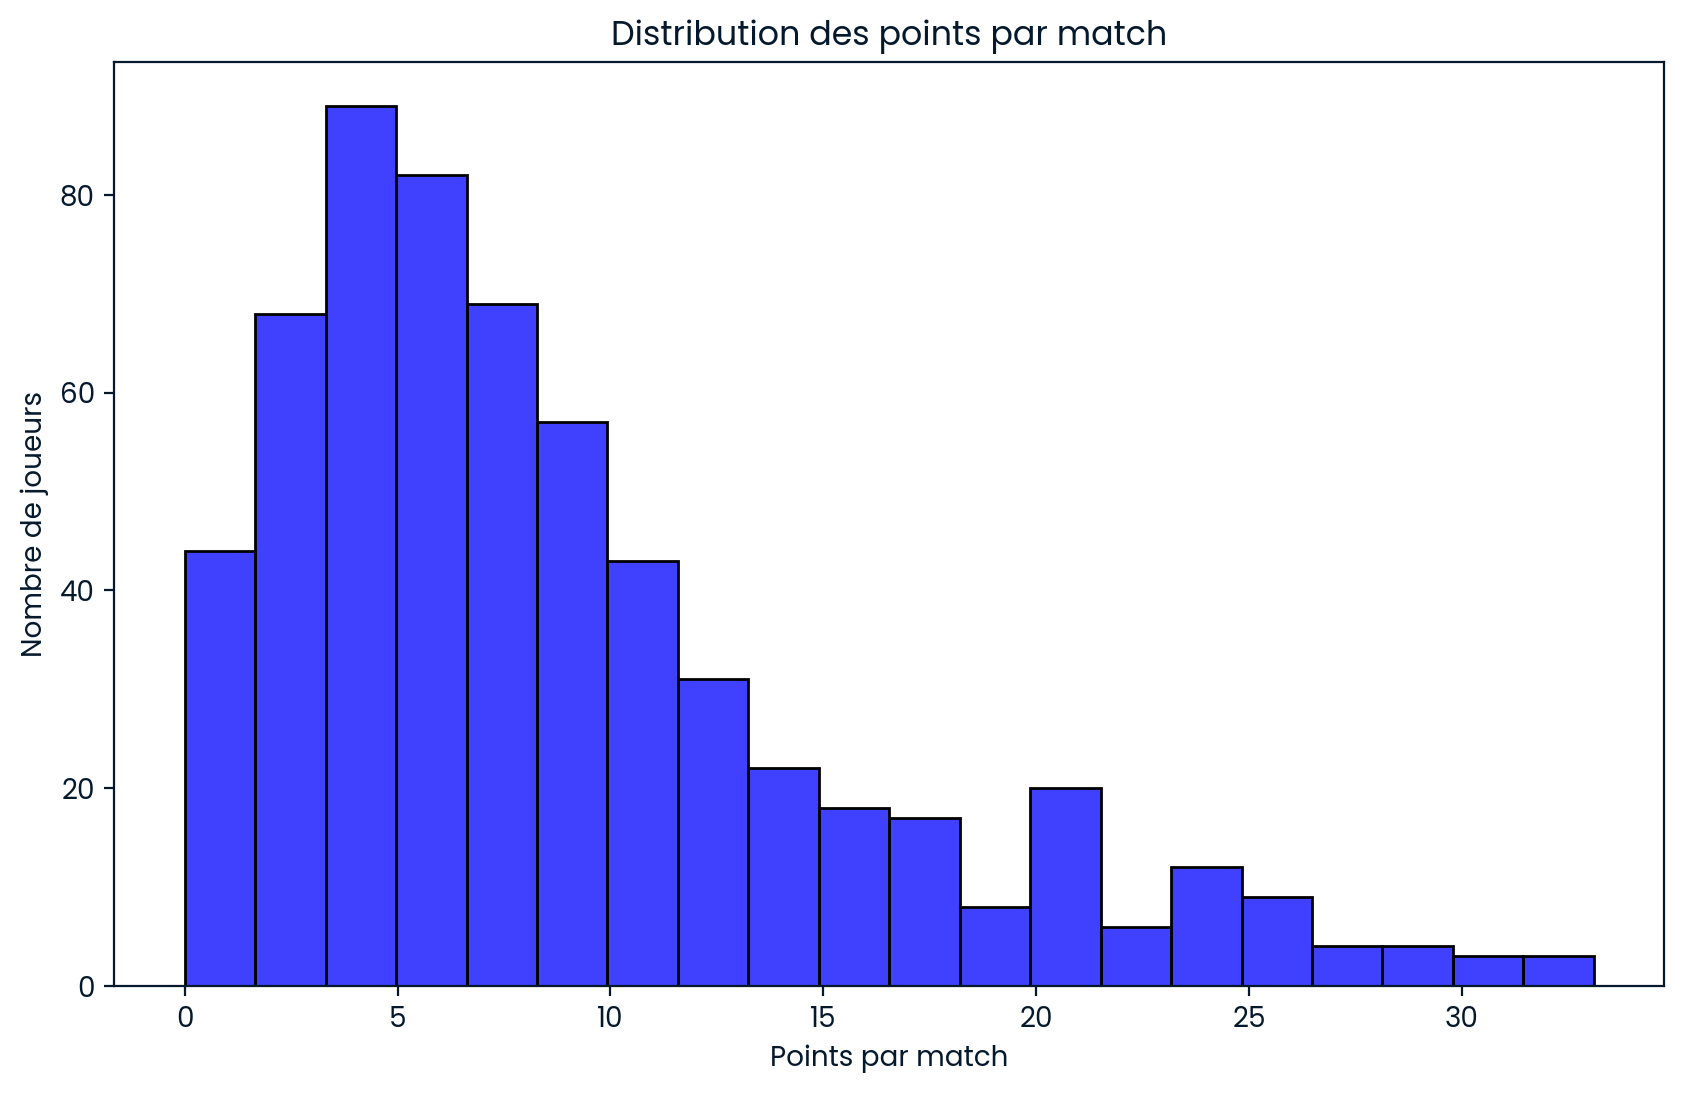

In [19]:
# Visualization 1: Points distribution
print("\n====================================\n")
print("Visualisation 1 : Distribution des Points par Match\n")
print("====================================\n")
print("Pour débuter l'analyse des statistiques NBA, nous examinons la distribution des points marqués\n")
print("par match par les joueurs. Cette visualisation permet de voir combien de joueurs atteignent\n")
print("des niveaux spécifiques de performance en termes de points. Cela nous aidera à identifier les\n")
print("tendances générales et les joueurs exceptionnellement performants.\n")
print("\n")

plt.figure(figsize=(10, 6))
sns.histplot(data=players_stats, x='PTS', bins=20, color='blue')
plt.title("Distribution des points par match")
plt.xlabel("Points par match")
plt.ylabel("Nombre de joueurs")
plt.show()



Visualisation 2 : Moyenne de Points par Position


Dans cette visualisation, nous analysons la moyenne des points marqués par les joueurs selon

leur position sur le terrain (ex : meneur, pivot, etc.). Cela nous permet de comprendre l'impact

typique de chaque rôle dans le jeu et d'identifier les positions les plus offensives.

Les positions sont affichées en tant que barres, avec leur hauteur représentant les points moyens.





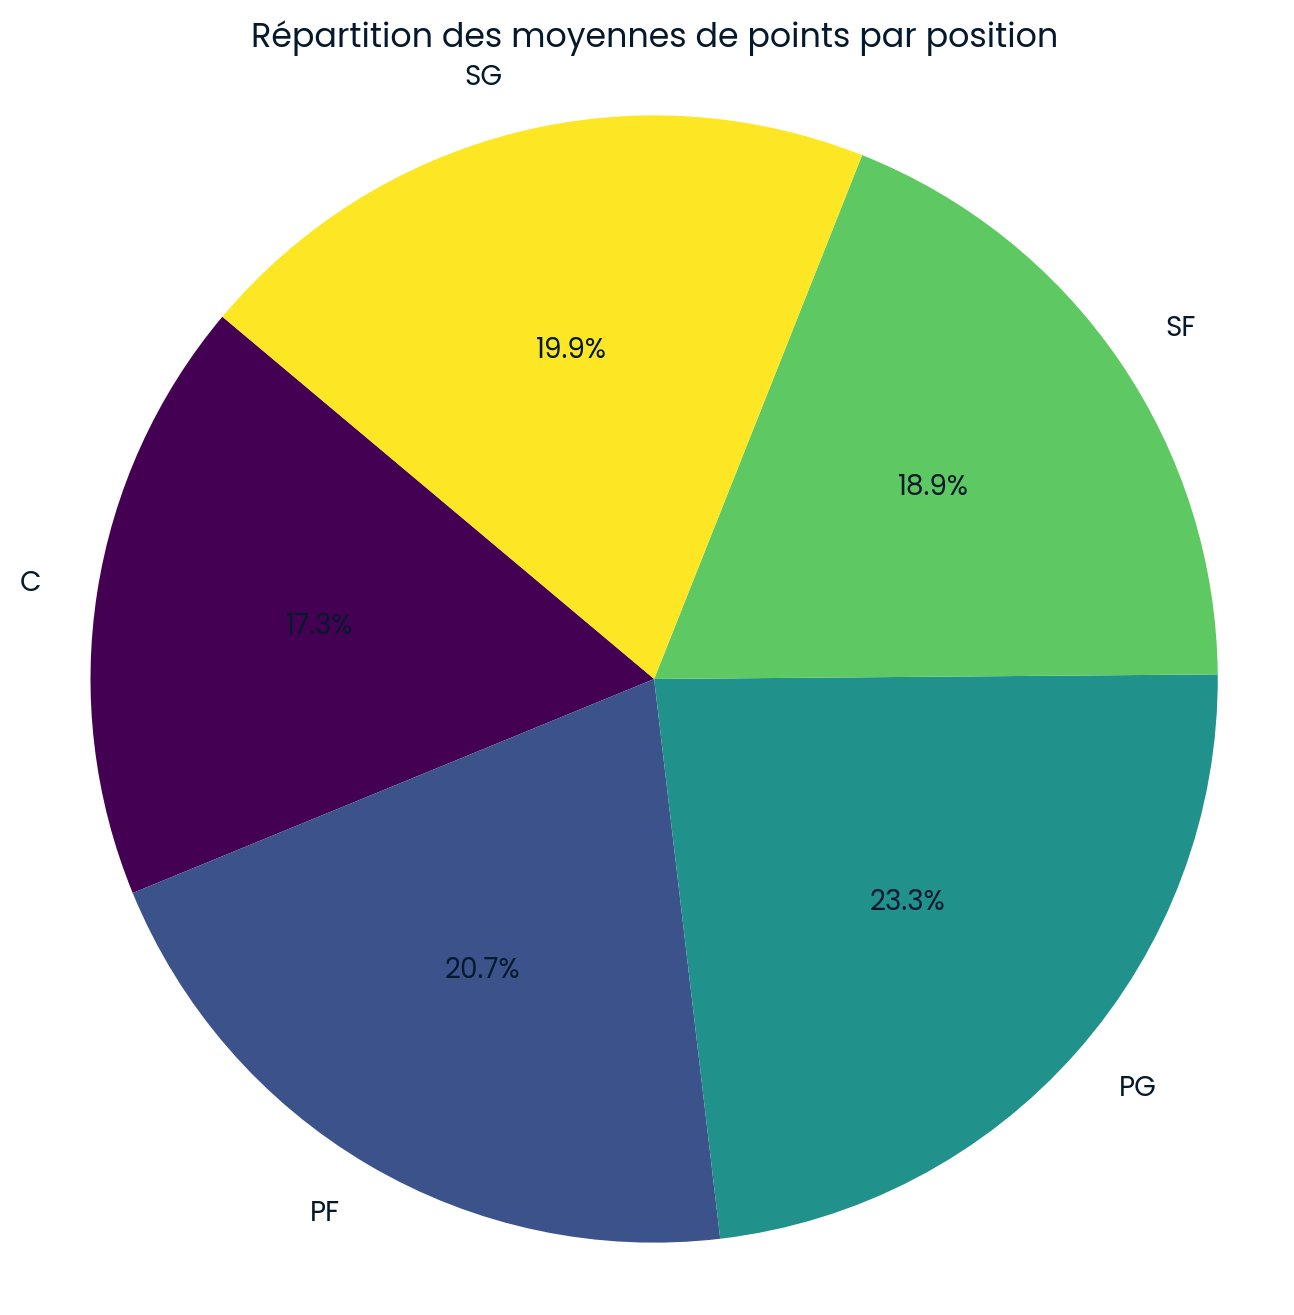

In [30]:
# Visualization 2: Average points by position
print("\n====================================\n")
print("Visualisation 2 : Moyenne de Points par Position\n")
print("====================================\n")
print("Dans cette visualisation, nous analysons la moyenne des points marqués par les joueurs selon\n")
print("leur position sur le terrain (ex : meneur, pivot, etc.). Cela nous permet de comprendre l'impact\n")
print("typique de chaque rôle dans le jeu et d'identifier les positions les plus offensives.\n")
print("Les positions sont affichées en tant que barres, avec leur hauteur représentant les points moyens.\n")
print("\n")


# Moyenne des points par position
avg_points = players_stats.groupby('Pos')['PTS'].mean().reset_index()

# Données pour le pie chart
labels = avg_points['Pos']
sizes = avg_points['PTS']

# Choisir un nombre de couleurs égal au nombre de positions
from matplotlib.cm import get_cmap
cmap = get_cmap('viridis', len(labels))  # viridis discret
colors = [cmap(i) for i in range(len(labels))]

# Camembert
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title("Répartition des moyennes de points par position")
plt.axis('equal')
plt.show()




Visualisation 3 : Répartition des Points par Équipe


Dans cette visualisation, nous analysons la répartition des points marqués par les joueurs

de chaque équipe. Ce graphique permet de comprendre les performances des différentes équipes

en termes de points marqués. Chaque équipe est représentée par une barre, et la hauteur de chaque

barre représente la somme totale des points marqués par les joueurs de cette équipe. Cela nous aide

à identifier les équipes les plus performantes offensivement dans la saison.





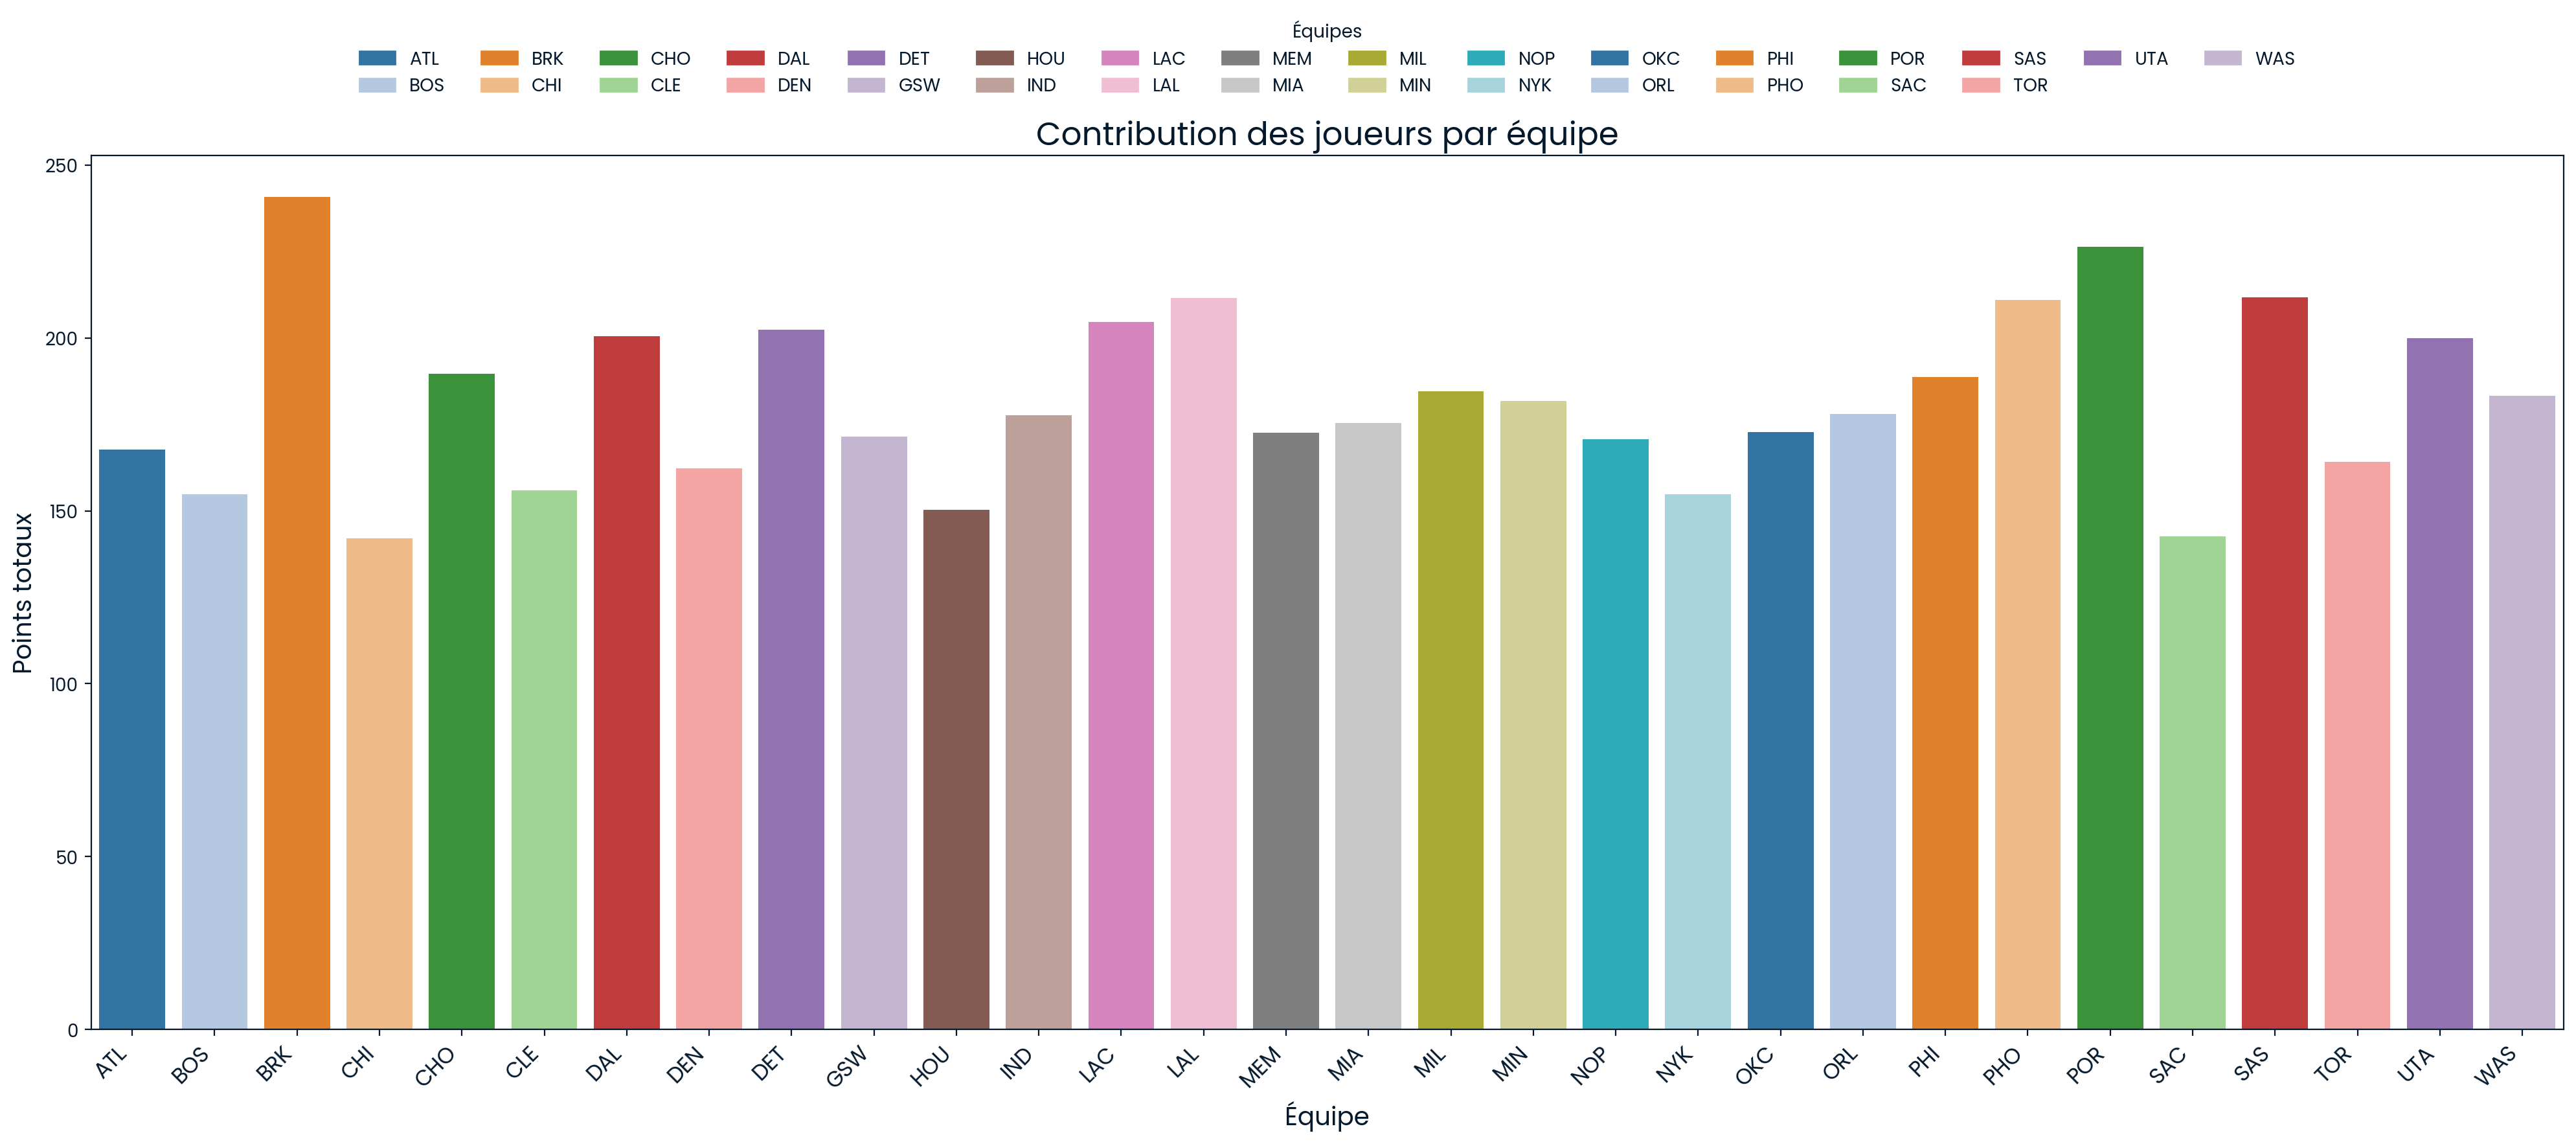

In [21]:
print("\n====================================\n")
print("Visualisation 3 : Répartition des Points par Équipe\n")
print("====================================\n")
print("Dans cette visualisation, nous analysons la répartition des points marqués par les joueurs\n")
print("de chaque équipe. Ce graphique permet de comprendre les performances des différentes équipes\n")
print("en termes de points marqués. Chaque équipe est représentée par une barre, et la hauteur de chaque\n")
print("barre représente la somme totale des points marqués par les joueurs de cette équipe. Cela nous aide\n")
print("à identifier les équipes les plus performantes offensivement dans la saison.\n")
print("\n")

# Agréger les points par équipe
team_points = players_stats.groupby('Team')['PTS'].sum().reset_index()

# Créer une figure plus grande
plt.figure(figsize=(20, 10))
barplot = sns.barplot(data=team_points, x='Team', y='PTS', palette='tab20')

# Titre et axes
plt.title("Contribution des joueurs par équipe", fontsize=18)
plt.xlabel("Équipe", fontsize=14)
plt.ylabel("Points totaux", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)  # Afficher les noms d'équipes sous les barres

# Créer la légende au-dessus
handles = []
labels = team_points['Team'].tolist()
for bar, label in zip(barplot.patches, labels):
    handles.append(plt.Rectangle((0, 0), 1, 1, color=bar.get_facecolor()))

plt.legend(handles, labels, title="Équipes", loc='lower center', bbox_to_anchor=(0.5, 1.05),
           ncol=len(labels)//2 + 1, frameon=False)

plt.tight_layout(rect=[0, 0, 1, 0.90])
plt.show()




Visualisation 4 : Corrélation entre les Passes Décisives et les Points


Dans cette visualisation, nous explorons la relation entre les passes décisives et les points

marqués par les joueurs. Chaque point représente un joueur, avec les passes décisives en abscisse

et les points en ordonnée. Ce graphique nous permet d'observer si une corrélation existe entre

les deux variables et d'identifier les joueurs qui se distinguent dans l'une ou l'autre catégorie.





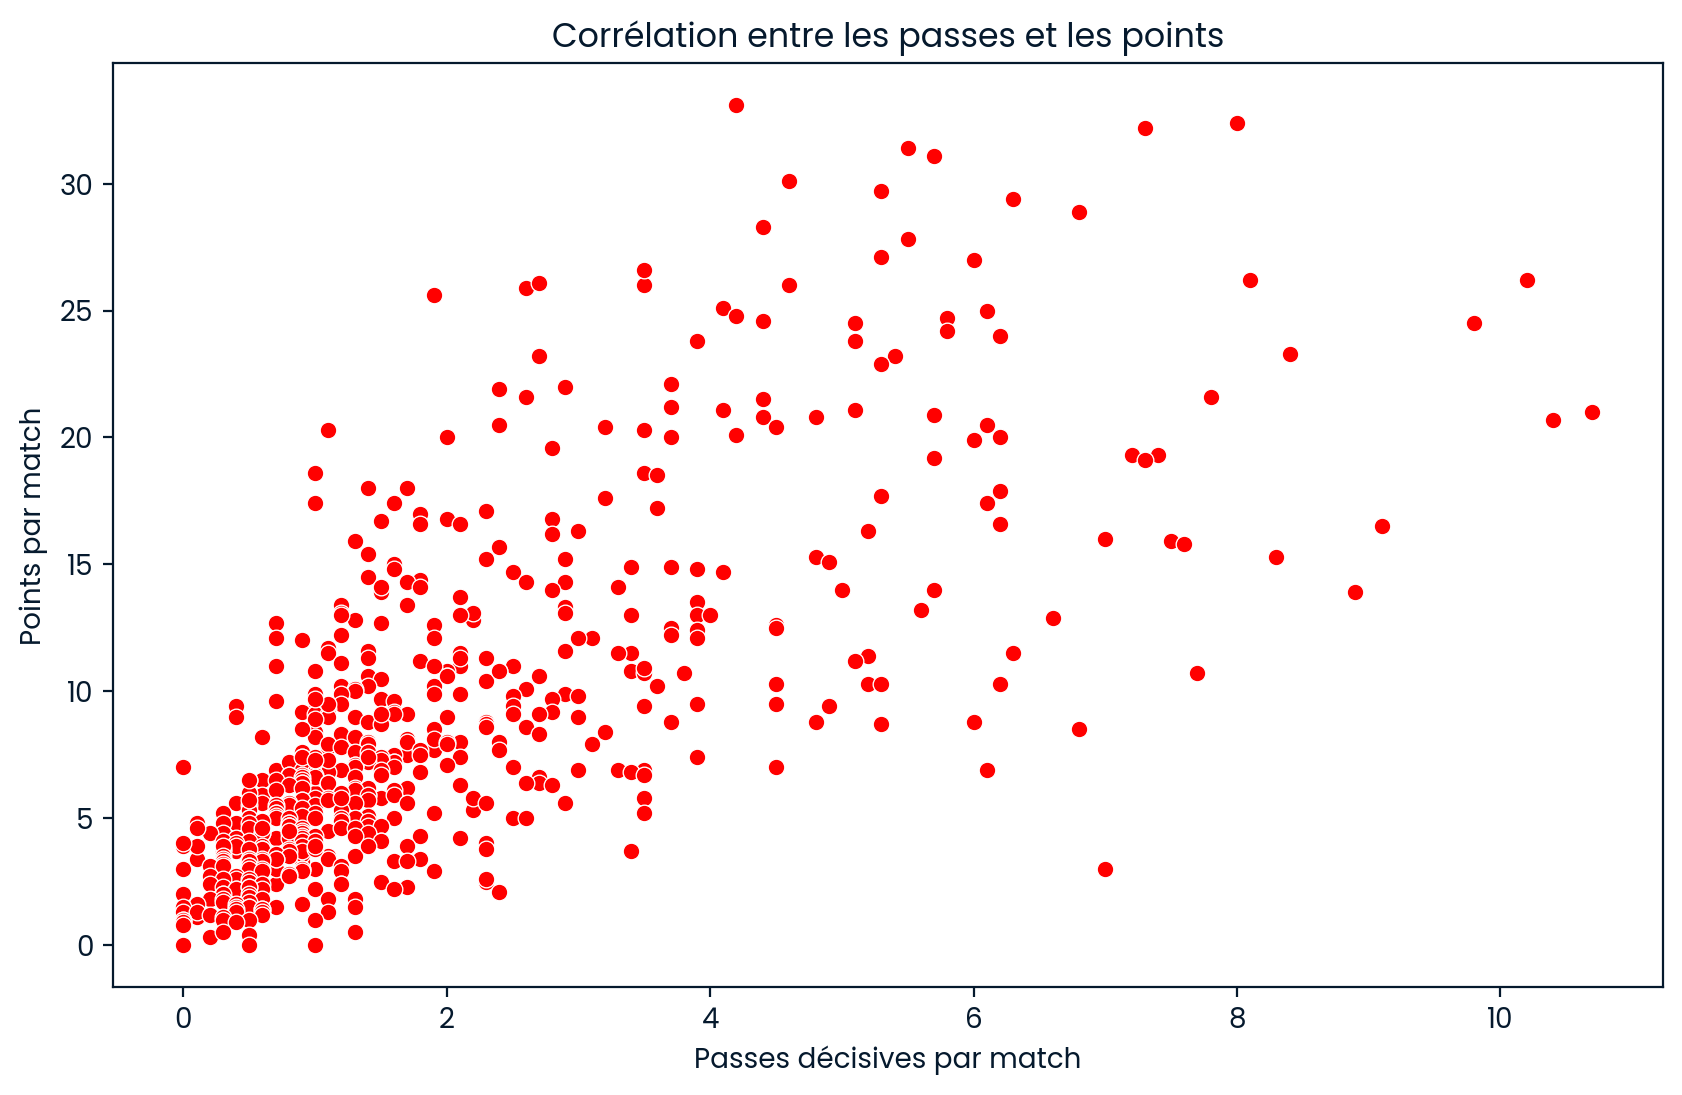

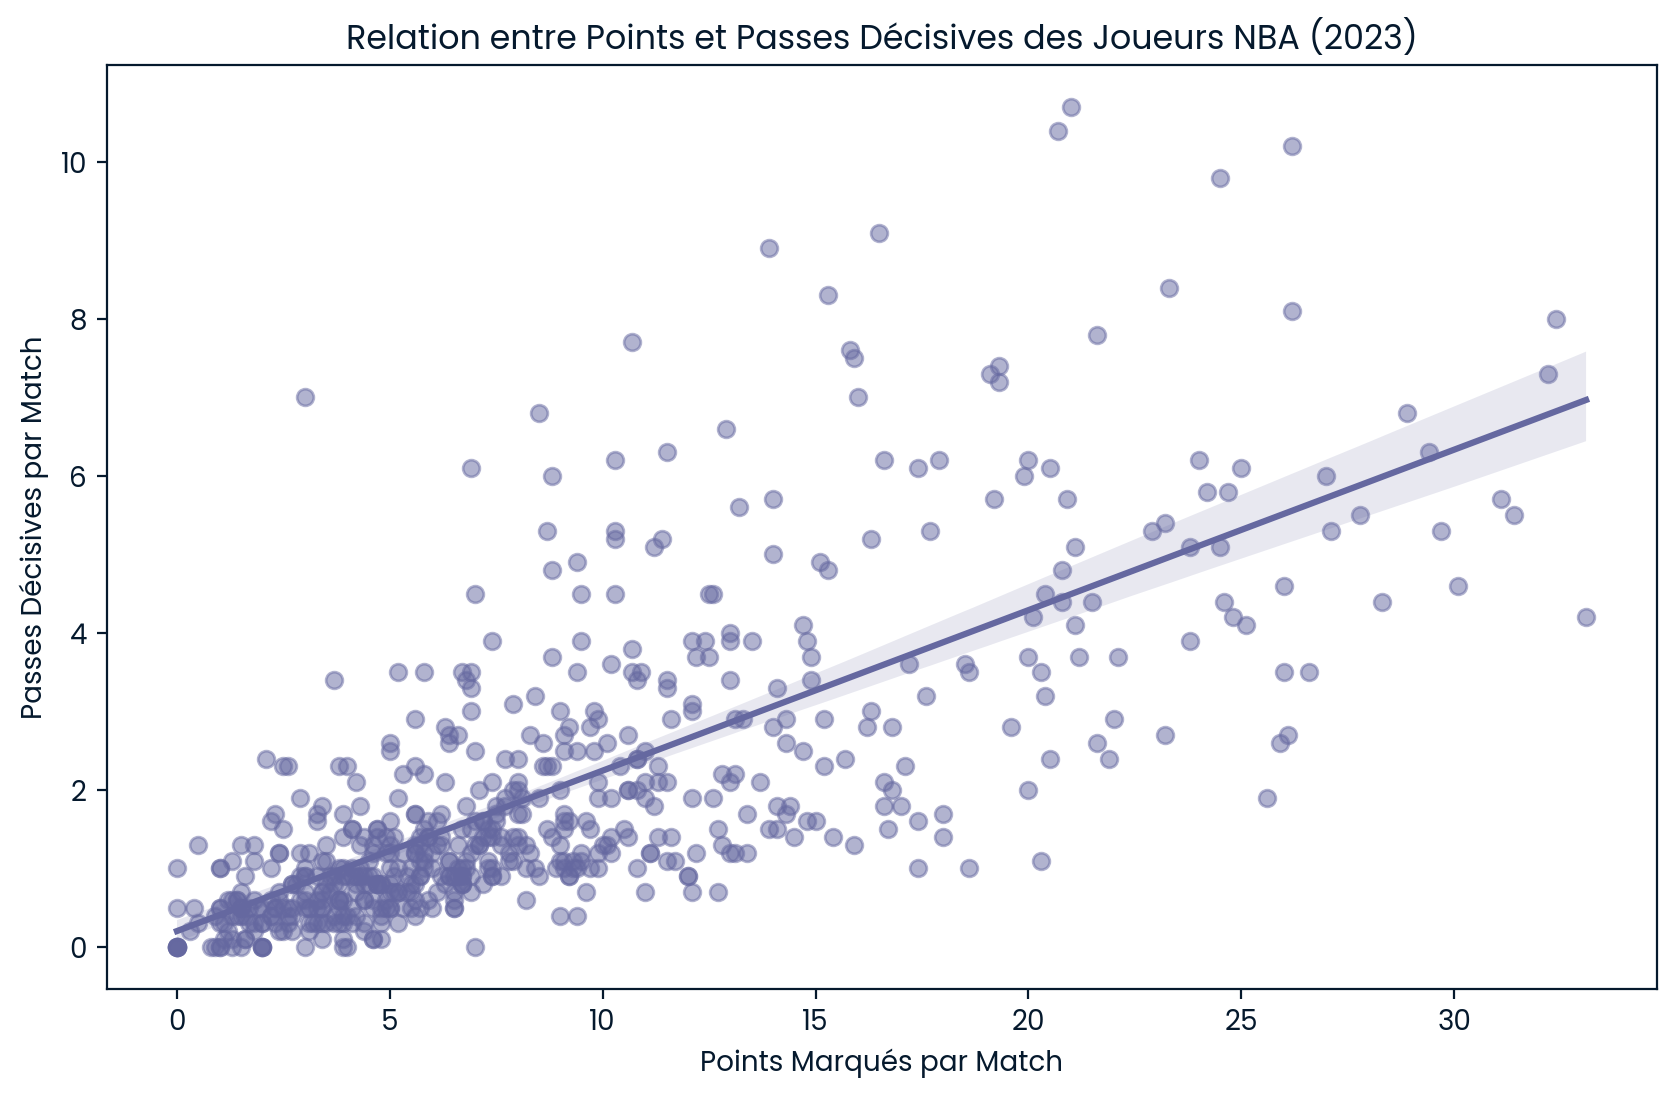

In [22]:
print("\n====================================\n")
print("Visualisation 4 : Corrélation entre les Passes Décisives et les Points\n")
print("====================================\n")
print("Dans cette visualisation, nous explorons la relation entre les passes décisives et les points\n")
print("marqués par les joueurs. Chaque point représente un joueur, avec les passes décisives en abscisse\n")
print("et les points en ordonnée. Ce graphique nous permet d'observer si une corrélation existe entre\n")
print("les deux variables et d'identifier les joueurs qui se distinguent dans l'une ou l'autre catégorie.\n")
print("\n")

plt.figure(figsize=(10, 6))
sns.scatterplot(data=players_stats, x='AST', y='PTS', color='red')
plt.title("Corrélation entre les passes et les points")
plt.xlabel("Passes décisives par match")
plt.ylabel("Points par match")
plt.show()

# Another version with regression line
plt.figure(figsize=(10, 6))
sns.regplot(data=players_stats, x='PTS', y='AST', scatter_kws={'alpha':0.5})
plt.title("Relation entre Points et Passes Décisives des Joueurs NBA (2023)")
plt.xlabel("Points Marqués par Match")
plt.ylabel("Passes Décisives par Match")
plt.show()




Visualisation 5 : Répartition des Rebonds par Équipe


Cette visualisation examine la répartition des rebonds par équipe à l'aide d'un boxplot.

Chaque boîte représente la variation des rebonds pour les joueurs d'une même équipe.

Cela nous permet d'identifier les équipes avec des performances homogènes ou des joueurs

exceptionnels en termes de rebonds. Les valeurs extrêmes (outliers) sont également mises en évidence.





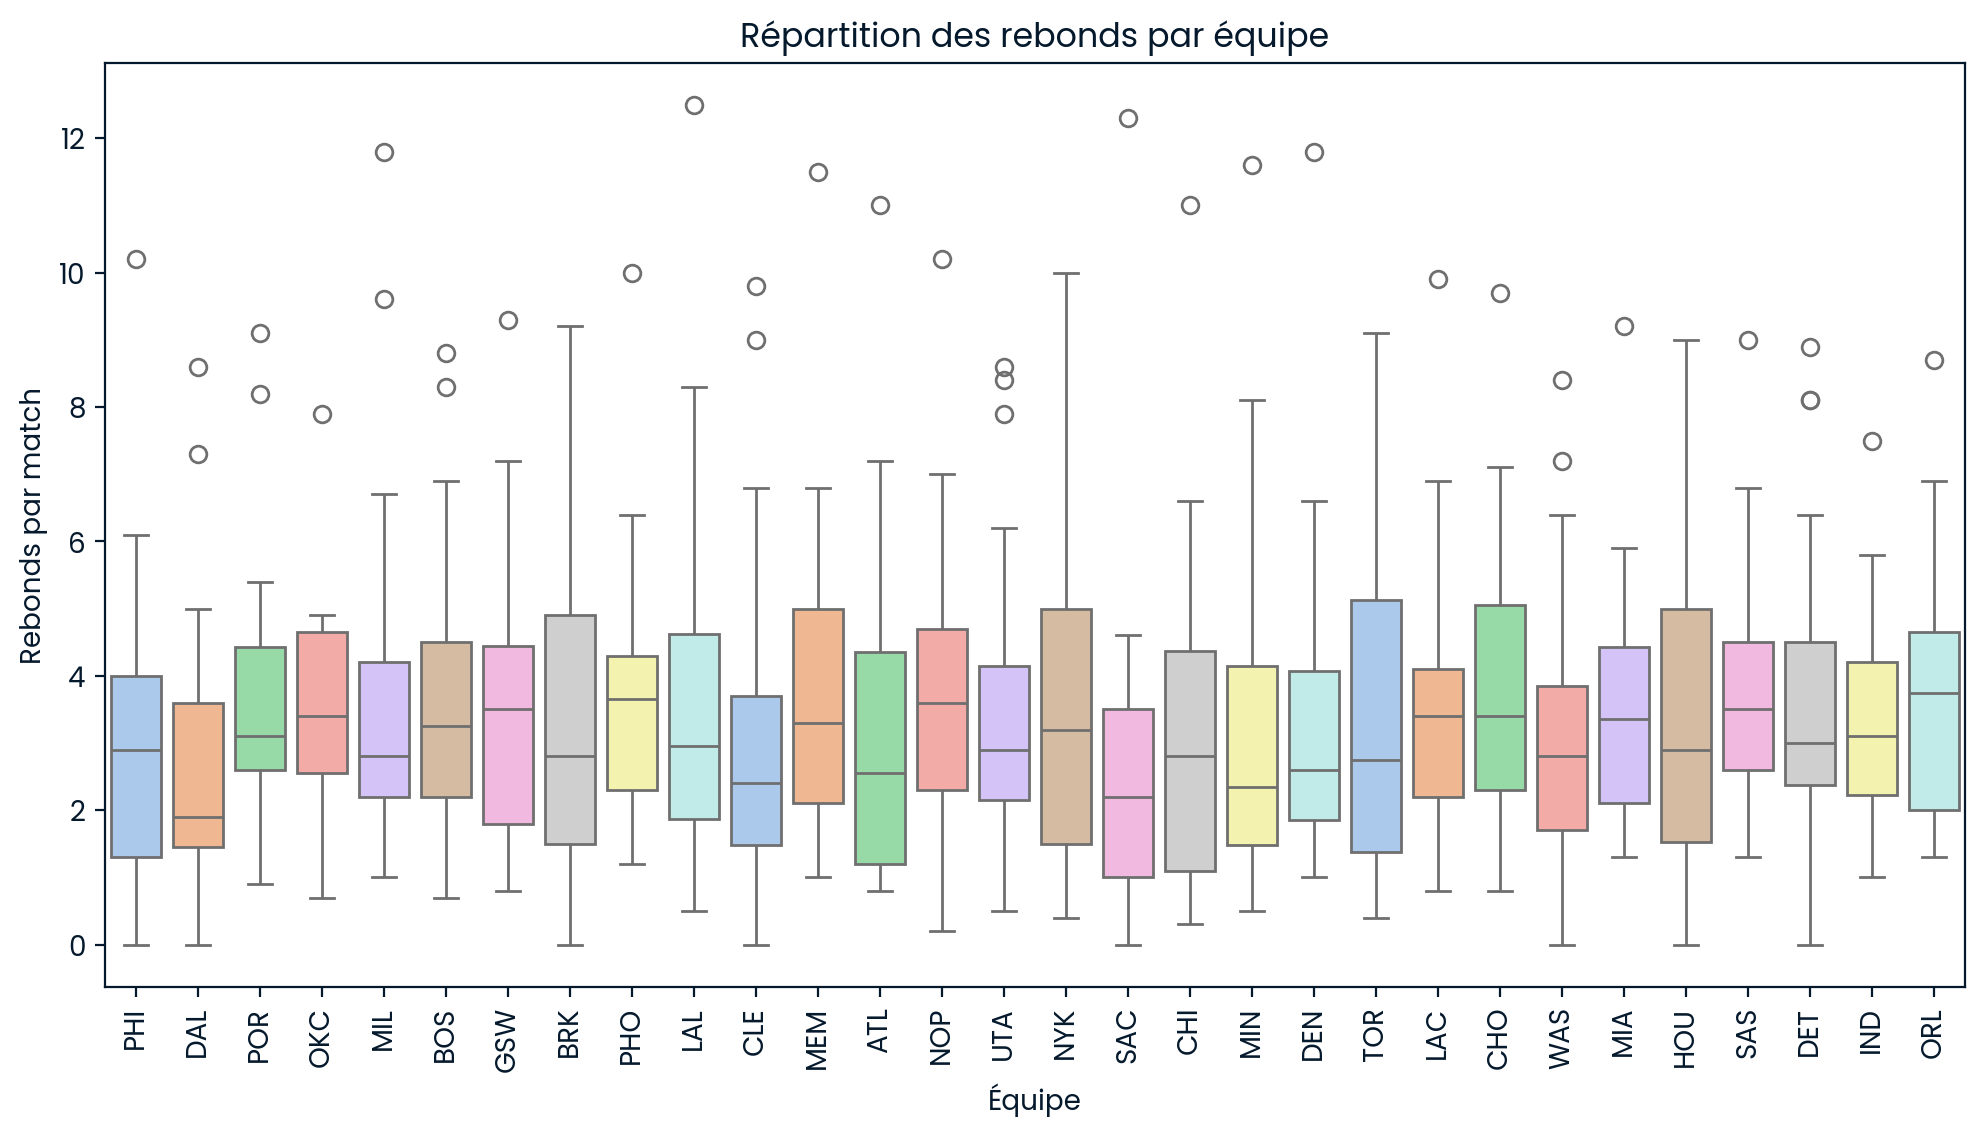

In [23]:
print("\n====================================\n")
print("Visualisation 5 : Répartition des Rebonds par Équipe\n")
print("====================================\n")
print("Cette visualisation examine la répartition des rebonds par équipe à l'aide d'un boxplot.\n")
print("Chaque boîte représente la variation des rebonds pour les joueurs d'une même équipe.\n")
print("Cela nous permet d'identifier les équipes avec des performances homogènes ou des joueurs\n")
print("exceptionnels en termes de rebonds. Les valeurs extrêmes (outliers) sont également mises en évidence.\n")
print("\n")

#Boxplot : Comparaison des rebonds par équipe
plt.figure(figsize=(12, 6))
sns.boxplot(data=players_stats, x='Team', y='TRB', palette='pastel')
plt.title("Répartition des rebonds par équipe")
plt.xlabel("Équipe")
plt.ylabel("Rebonds par match")
plt.xticks(rotation=90)
plt.show()



Visualisation 6 : Nombre de Récompenses par Joueur


Note: Cette visualisation nécessite une colonne 'Awards' qui pourrait ne pas être présente dans les données scrapées.
Nous allons donc simuler des données de récompenses pour cette visualisation.
Dans cette visualisation, nous comptons le nombre de récompenses que chaque joueur NBA a reçues

pour la saison 2023. Les joueurs ayant plusieurs récompenses apparaîtront avec des barres plus hautes.

Les récompenses sont extraites de la colonne 'Awards' et comptées, chaque joueur étant affiché

avec le nombre total de récompenses obtenues.





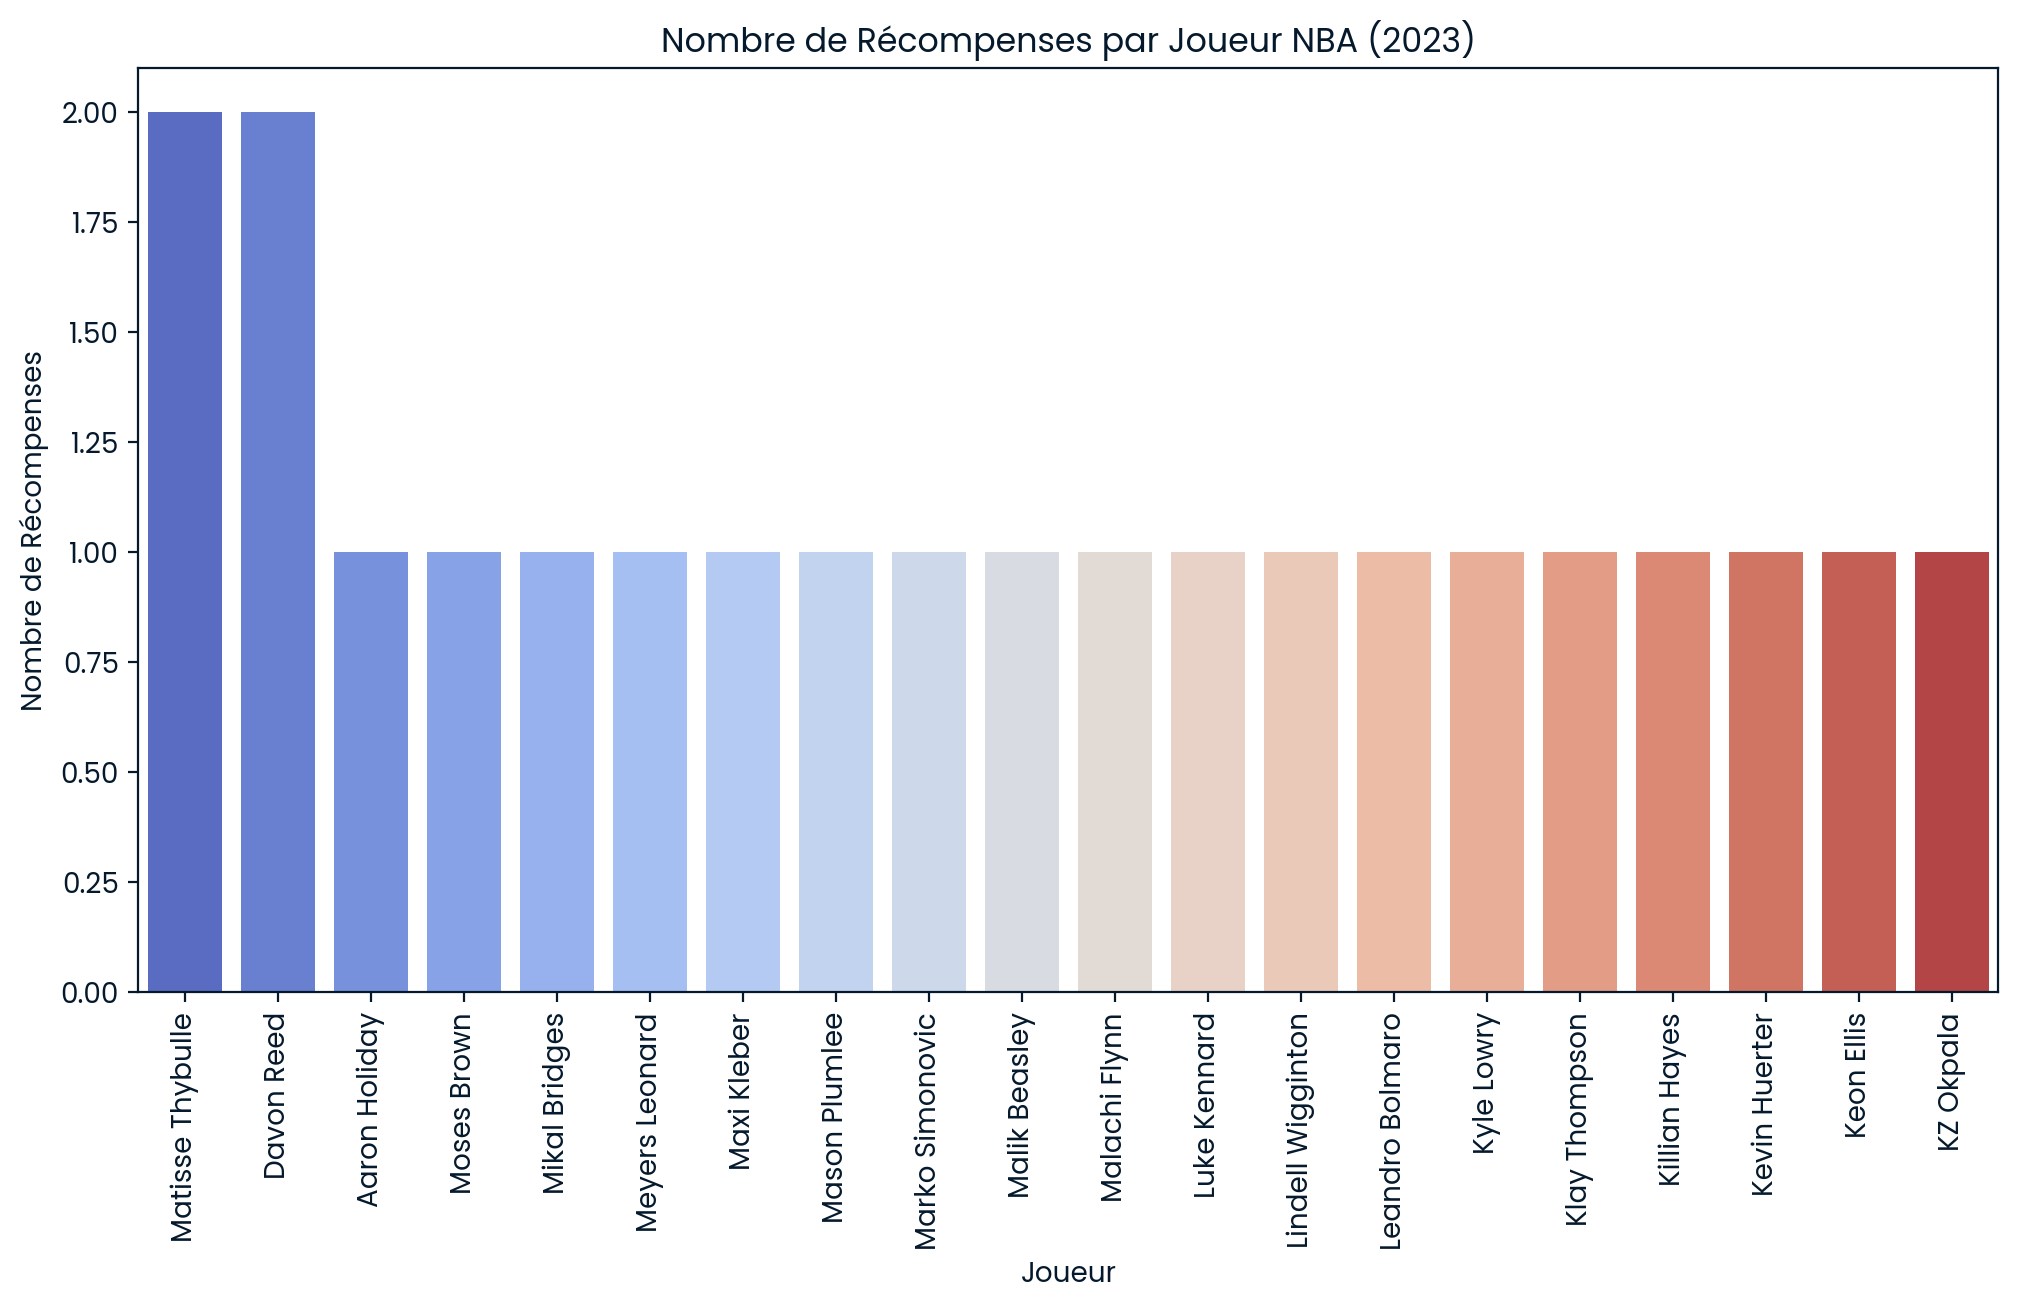

In [24]:
print("\n====================================\n")
print("Visualisation 6 : Nombre de Récompenses par Joueur\n")
print("====================================\n")
print("Note: Cette visualisation nécessite une colonne 'Awards' qui pourrait ne pas être présente dans les données scrapées.")
print("Nous allons donc simuler des données de récompenses pour cette visualisation.")
print("Dans cette visualisation, nous comptons le nombre de récompenses que chaque joueur NBA a reçues\n")
print("pour la saison 2023. Les joueurs ayant plusieurs récompenses apparaîtront avec des barres plus hautes.\n")
print("Les récompenses sont extraites de la colonne 'Awards' et comptées, chaque joueur étant affiché\n")
print("avec le nombre total de récompenses obtenues.\n")
print("\n")

np.random.seed(42)
players_stats['Awards'] = np.random.choice(['All-Star', 'MVP', 'DPOY', 'ROY', '6MOTY', ''], 
                                         size=len(players_stats), 
                                         p=[0.05, 0.01, 0.03, 0.02, 0.04, 0.85])

player_awards_count = players_stats[players_stats['Awards'] != ''].groupby('Player')['Awards'].count().reset_index()
player_awards_count.columns = ['Player', 'Number_of_Awards']
player_awards_count = player_awards_count.sort_values('Number_of_Awards', ascending=False).head(20)

plt.figure(figsize=(12, 6))
sns.barplot(data=player_awards_count, x='Player', y='Number_of_Awards', palette='coolwarm')
plt.title("Nombre de Récompenses par Joueur NBA (2023)")
plt.xlabel("Joueur")
plt.ylabel("Nombre de Récompenses")
plt.xticks(rotation=90)
plt.show()



Visualisation 7 : Comparaison des Statistiques de Défense et d'Attaque


Dans cette visualisation, nous comparons les statistiques de défense (vols, blocs, rebonds défensifs)

et d'attaque (points, passes, rebonds offensifs) pour les joueurs ayant marqué plus de 25 points par match.

Les joueurs ayant un score élevé sont affichés avec des barres plus hautes dans le graphique.





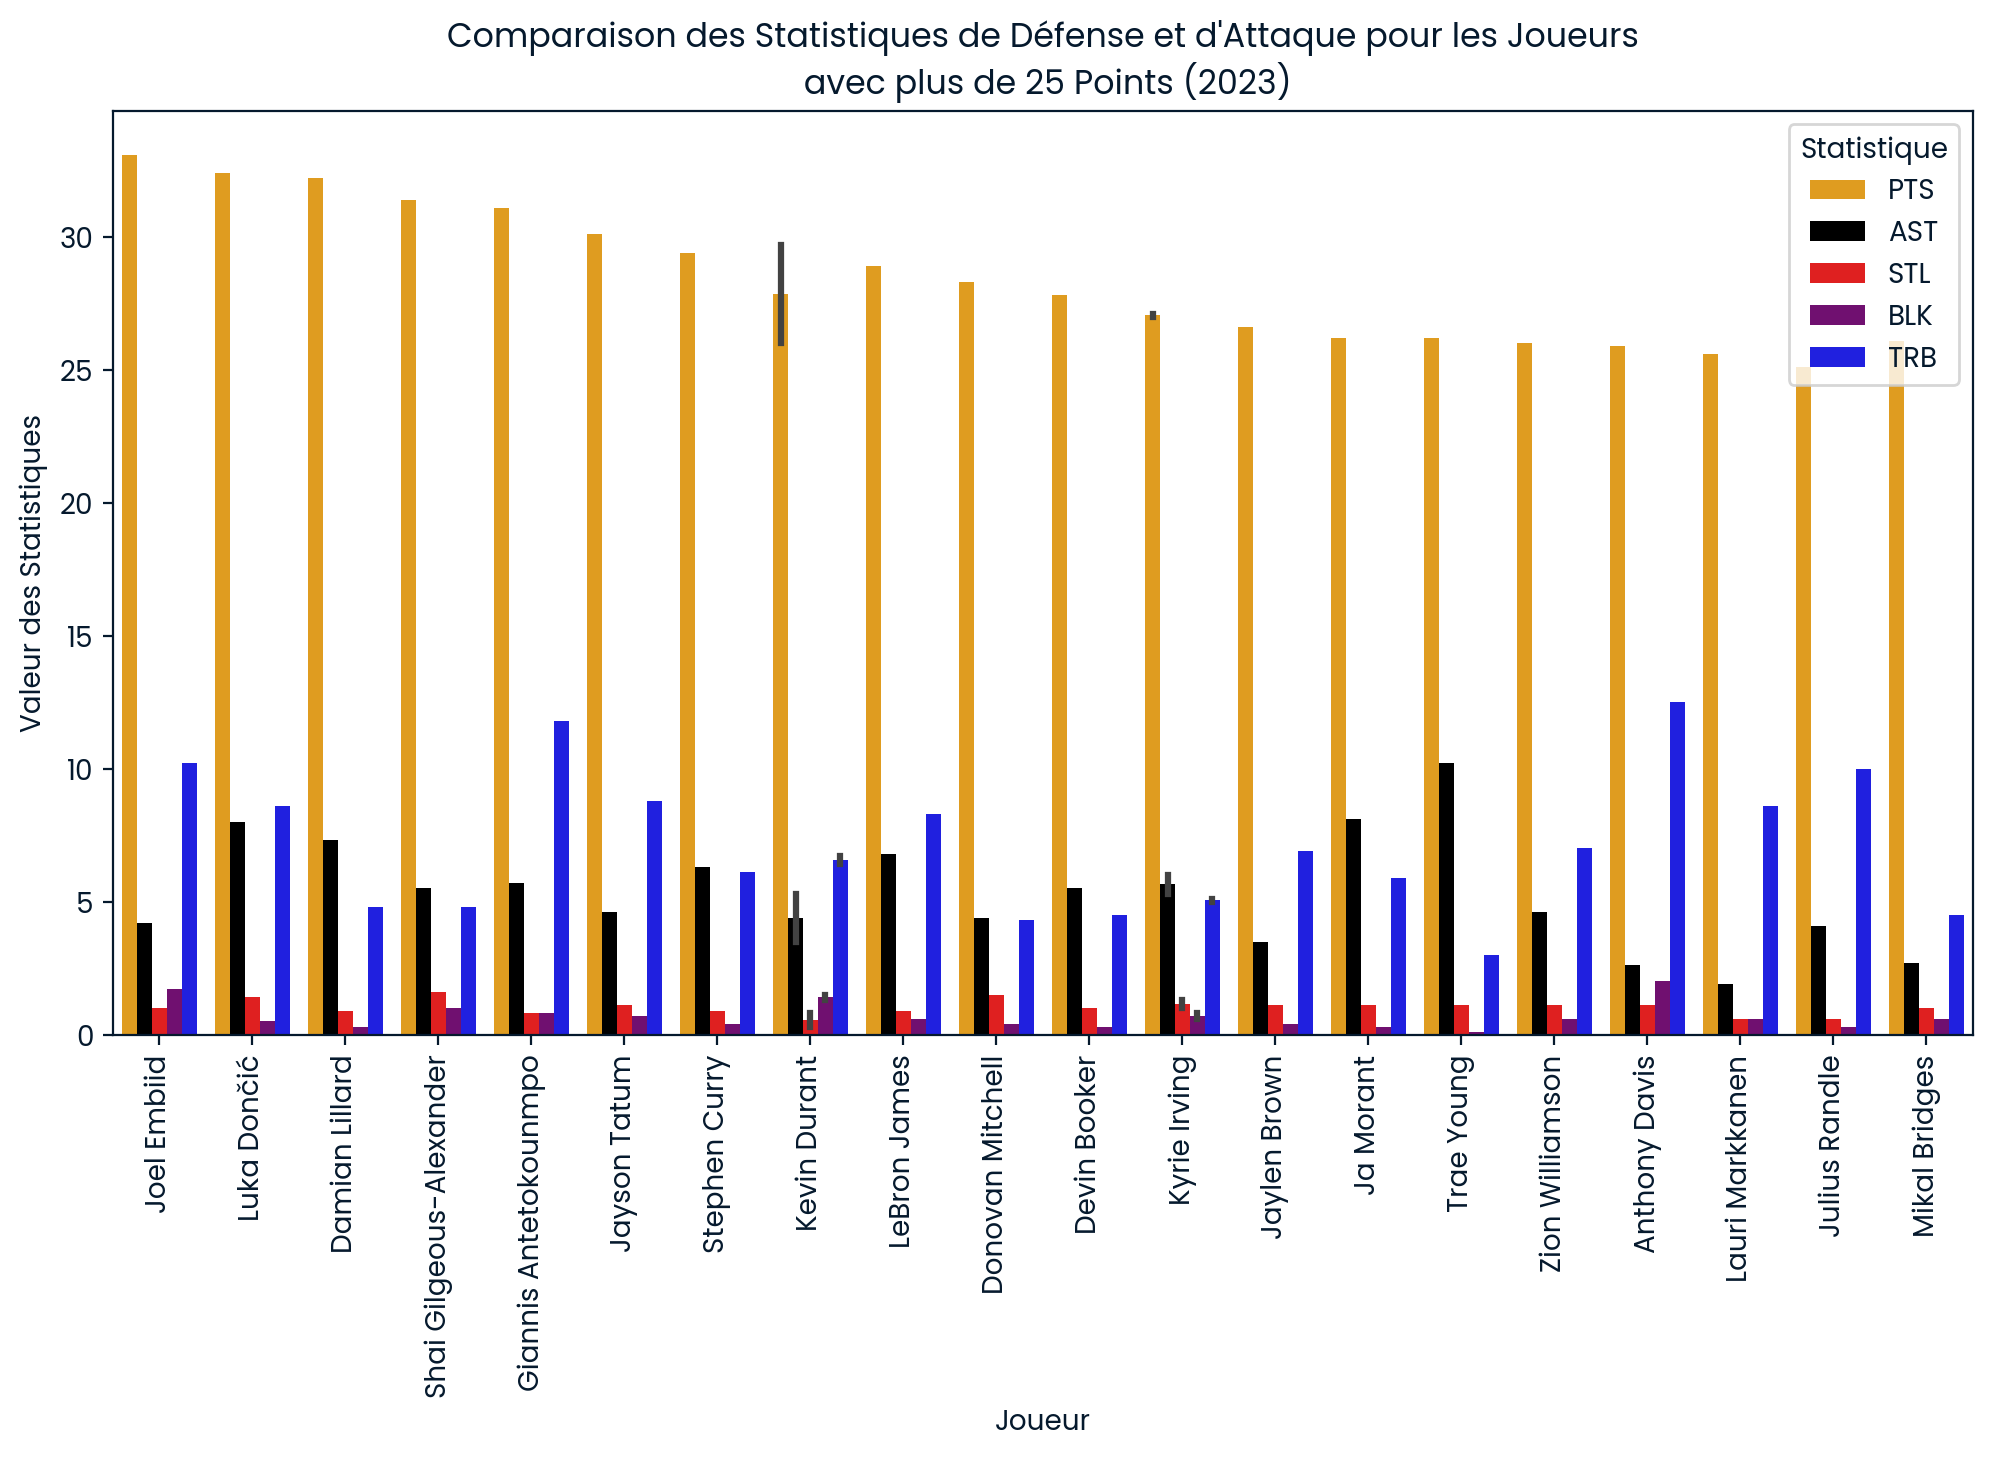

In [25]:
print("\n====================================\n")
print("Visualisation 7 : Comparaison des Statistiques de Défense et d'Attaque\n")
print("====================================\n")
print("Dans cette visualisation, nous comparons les statistiques de défense (vols, blocs, rebonds défensifs)\n")
print("et d'attaque (points, passes, rebonds offensifs) pour les joueurs ayant marqué plus de 25 points par match.\n")
print("Les joueurs ayant un score élevé sont affichés avec des barres plus hautes dans le graphique.\n")
print("\n")

# Bar Chart : Attaque et defense des joueurs qui ont plus de 25 points par match 
players_above_25 = players_stats[players_stats['PTS'] > 25]
players_melted = players_above_25.melt(id_vars=['Player'], 
                                      value_vars=['PTS', 'AST', 'STL', 'BLK', 'TRB'],
                                      var_name='Stat', value_name='Value')

plt.figure(figsize=(12, 6))
sns.barplot(data=players_melted, x='Player', y='Value', hue='Stat', palette=['orange', 'black', 'red', 'purple', 'blue'])
plt.title("Comparaison des Statistiques de Défense et d'Attaque pour les Joueurs\n avec plus de 25 Points (2023)")
plt.xlabel("Joueur")
plt.ylabel("Valeur des Statistiques")
plt.xticks(rotation=90)
plt.legend(title='Statistique')
plt.show()



Visualisation 8 : Heatmap Normalisée des Moyennes par Position (Joueurs avec 60+ matchs)


Cette heatmap montre les moyennes des statistiques suivantes pour chaque position :

- Points, Passes Décisives, Rebonds, Contres, Vols, Ballons Perdus (TOV), Fautes Personnelles (PF).

Nous avons filtré les joueurs ayant joué au moins 60 matchs pour garantir que les statistiques sont significatives.

- Chaque statistique est normalisée (0 à 1) pour permettre une comparaison équitable.

- Les couleurs varient de rose clair (faible contribution) à rouge foncé (forte contribution).

Cela permet de mettre en évidence les forces et faiblesses relatives des positions, en excluant les joueurs ayant peu joué.



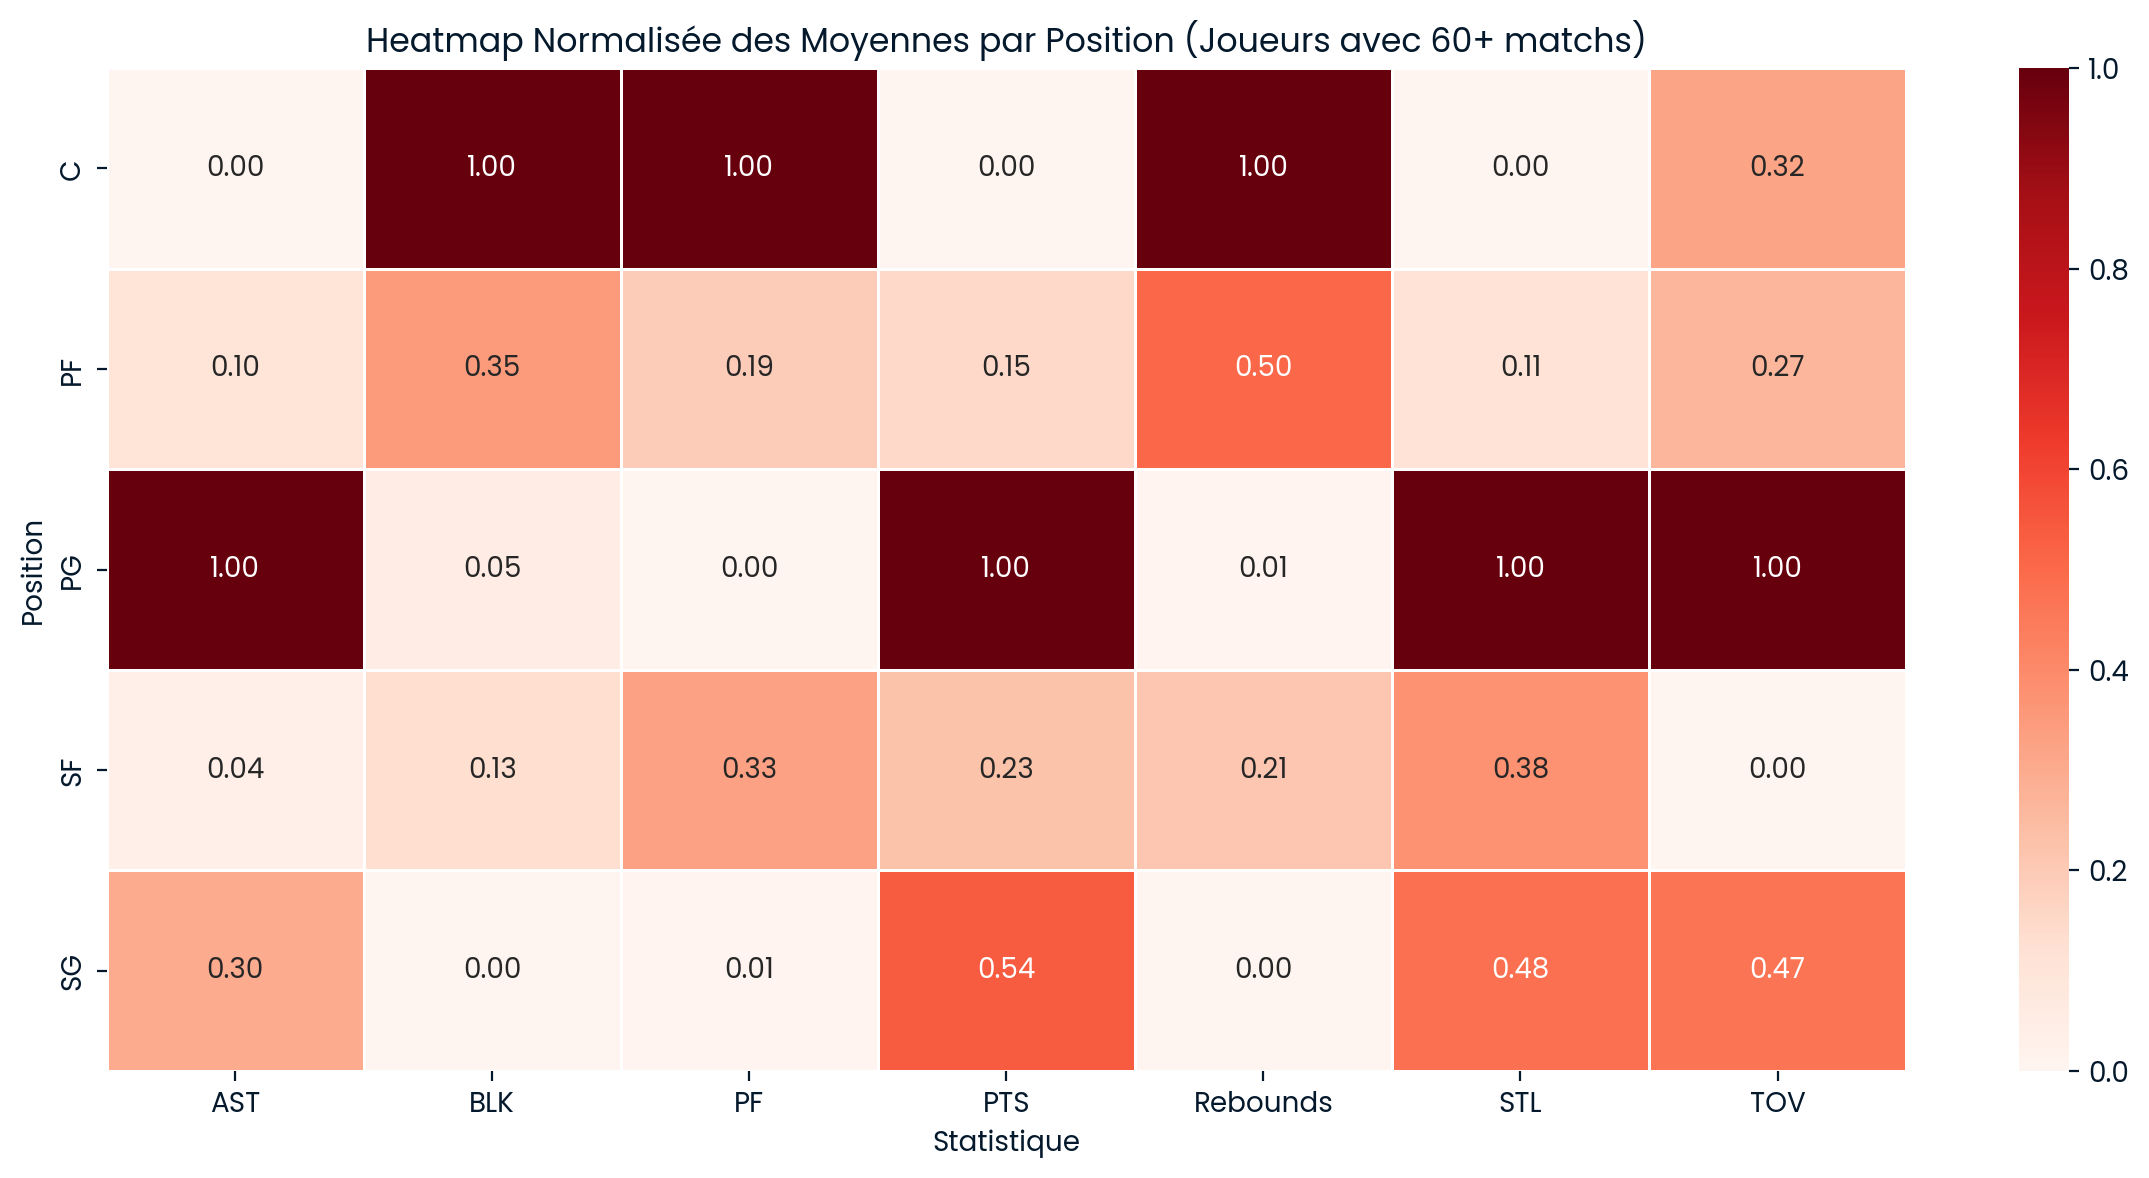

In [26]:
print("\n====================================\n")
print("Visualisation 8 : Heatmap Normalisée des Moyennes par Position (Joueurs avec 60+ matchs)\n")
print("====================================\n")
print("Cette heatmap montre les moyennes des statistiques suivantes pour chaque position :\n")
print("- Points, Passes Décisives, Rebonds, Contres, Vols, Ballons Perdus (TOV), Fautes Personnelles (PF).\n")
print("Nous avons filtré les joueurs ayant joué au moins 60 matchs pour garantir que les statistiques sont significatives.\n")
print("- Chaque statistique est normalisée (0 à 1) pour permettre une comparaison équitable.\n")
print("- Les couleurs varient de rose clair (faible contribution) à rouge foncé (forte contribution).\n")
print("Cela permet de mettre en évidence les forces et faiblesses relatives des positions, en excluant les joueurs ayant peu joué.\n")

# Heatmap: Moyennes de Statistiques par Position
# Filter players with 60+ games
players_stats_filtered = players_stats[players_stats['G'] >= 60]

# Calculate mean stats by position
position_stats = players_stats_filtered.groupby('Pos').agg({
    'PTS': 'mean',
    'AST': 'mean',
    'DRB': 'mean',
    'ORB': 'mean',
    'BLK': 'mean',
    'STL': 'mean',
    'TOV': 'mean',
    'PF': 'mean'
}).reset_index()

# Calculate total rebounds
position_stats['Rebounds'] = position_stats['DRB'] + position_stats['ORB']
position_stats.drop(['DRB', 'ORB'], axis=1, inplace=True)

# Normalize the data (0-1 scaling)
normalized_stats = position_stats.copy()
stats_to_normalize = ['PTS', 'AST', 'Rebounds', 'BLK', 'STL', 'TOV', 'PF']
normalized_stats[stats_to_normalize] = normalized_stats[stats_to_normalize].apply(
    lambda x: (x - x.min()) / (x.max() - x.min())
)

# Melt the data for proper heatmap format
melted_stats = normalized_stats.melt(id_vars=['Pos'], 
                                   value_vars=stats_to_normalize,
                                   var_name='Stat', 
                                   value_name='Normalized_Value')

# Create pivot table using the correct syntax
heatmap_data = melted_stats.pivot(index='Pos', columns='Stat', values='Normalized_Value')

# Create the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(data=heatmap_data, 
            cmap='Reds', 
            annot=True, 
            linewidths=.5,
            fmt='.2f')  # Format annotations to 2 decimal places

plt.title("Heatmap Normalisée des Moyennes par Position (Joueurs avec 60+ matchs)")
plt.xlabel("Statistique")
plt.ylabel("Position")
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()


ANALYSE : Relations clés dans les performances NBA
--------------------------------------------------
Nous examinons deux relations fondamentales :
1. Points vs Minutes Jouées: Montre comment la production offensive
   évolue avec le temps de jeu (en bleu)
2. Passes Décisives vs % de Tirs: Révèle si les joueurs qui passent
   plus tentent moins de tirs (en rouge)
Ces tendances aident à comprendre les stratégies de jeu dominantes.



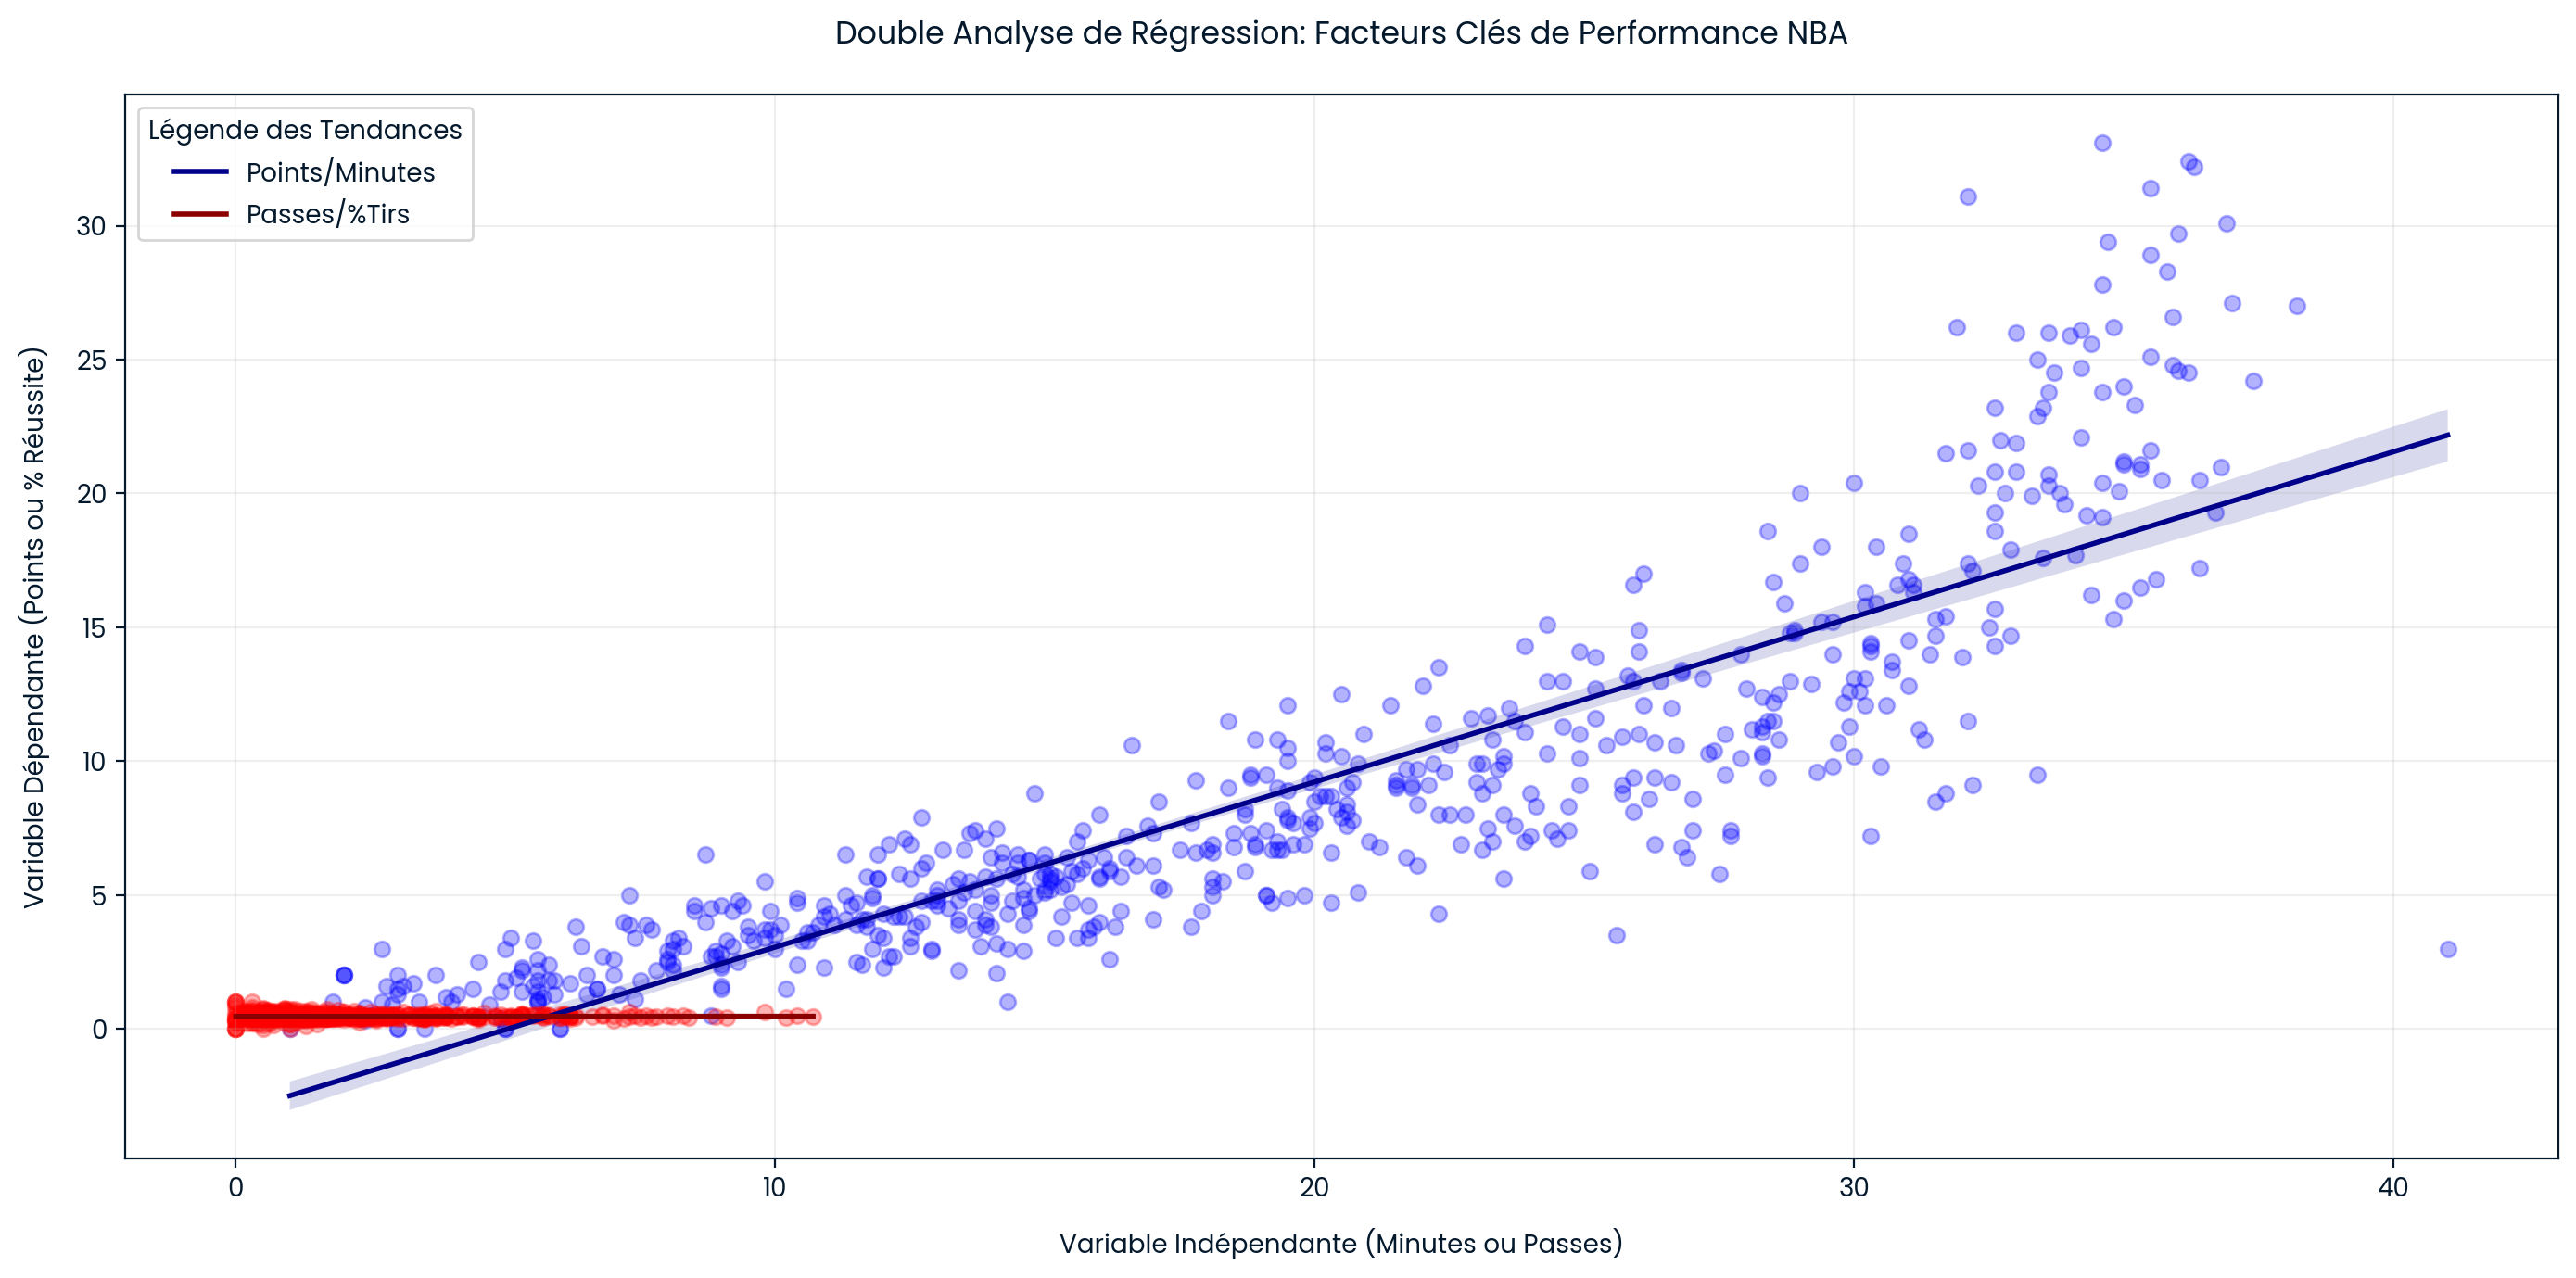

In [27]:
# =========================================================================
# EXPLICATION DE L'ANALYSE
# =========================================================================
print("\nANALYSE : Relations clés dans les performances NBA")
print("--------------------------------------------------")
print("Nous examinons deux relations fondamentales :")
print("1. Points vs Minutes Jouées: Montre comment la production offensive")
print("   évolue avec le temps de jeu (en bleu)")
print("2. Passes Décisives vs % de Tirs: Révèle si les joueurs qui passent")
print("   plus tentent moins de tirs (en rouge)")
print("Ces tendances aident à comprendre les stratégies de jeu dominantes.\n")

# Préparation du graphique
plt.figure(figsize=(14, 7))

# Première régression (Points vs Minutes)
sns.regplot(data=players_stats,
            x='MP', y='PTS',
            scatter_kws={'alpha':0.3, 'color':'blue'},
            line_kws={'color':'darkblue', 'label':'Points/Minutes', 'linewidth':2},
            ci=95)  # Intervalle de confiance à 95%

# Deuxième régression (Passes vs % de tirs)
sns.regplot(data=players_stats,
            x='AST', y='FG%',
            scatter_kws={'alpha':0.3, 'color':'red'},
            line_kws={'color':'darkred', 'label':'Passes/%Tirs', 'linewidth':2},
            ci=95)

# Personnalisation
plt.title("Double Analyse de Régression: Facteurs Clés de Performance NBA", pad=20)
plt.xlabel("Variable Indépendante (Minutes ou Passes)", labelpad=10)
plt.ylabel("Variable Dépendante (Points ou % Réussite)", labelpad=10)
plt.legend(title="Légende des Tendances", frameon=True)
plt.grid(alpha=0.2)

# Affichage
plt.tight_layout()
plt.show()

In [28]:
print("\n====================================\n")
print("Visualisation Interactive des Performances NBA\n")
print("====================================\n")
print("Nous allons finir par une exploration des performances des joueurs NBA grâce à un graphique interactif.\n")
print("Ce graphique permet de visualiser la relation entre les points marqués, les passes décisives,\n")
print("et les rebonds. Les joueurs sont différenciés par leur position et leur taille de bulle indique\n")
print("leur contribution en termes de rebonds. Vous pouvez interagir avec ce graphique pour examiner\n")
print("les données de manière plus détaillée.\n")
print("\n")

fig = px.scatter(players_stats, x='PTS', y='AST', size='TRB', color='Pos',
                 hover_data=['Player', 'Team', 'TRB'],
                 title="Exploration des performances des joueurs NBA")
fig.update_layout(xaxis_title="Points par match",
                 yaxis_title="Passes décisives par match")
fig.show()



Visualisation Interactive des Performances NBA


Nous allons finir par une exploration des performances des joueurs NBA grâce à un graphique interactif.

Ce graphique permet de visualiser la relation entre les points marqués, les passes décisives,

et les rebonds. Les joueurs sont différenciés par leur position et leur taille de bulle indique

leur contribution en termes de rebonds. Vous pouvez interagir avec ce graphique pour examiner

les données de manière plus détaillée.





In [29]:
print("\n******************************")
print("  Remarque sur mes choix dans le code")
print("******************************")
print("\nDans ce script, j'ai choisi d'utiliser print() avec des chaînes multilignes pour :")
print(" - Afficher du texte de manière fluide.")
print(" - Organiser les affichages avec des sauts de ligne.")
print("\nJ'ai également utilisé des commentaires pour expliquer chaque étape de mon code.")
print("Cela permet :")
print(" - D'aider les lecteurs à comprendre les différentes parties du programme.")
print(" - D'identifier facilement les sections importantes ou potentiellement problématiques.")
print("\nCes choix visent à rendre le code plus clair, lisible et maintenable.")

print("\n************************************")
print("Conclusion")
print("************************************")
print("Le projet a permis de collecter et d'analyser les statistiques des joueurs NBA pour la saison 2023.")
print("Les visualisations montrent les meilleurs joueurs par points, la distribution des points, la répartition")
print("des positions, et la relation entre les passes décisives et les points. Ces résultats permettent de")
print("mieux comprendre les performances des joueurs.")
print("\n")


******************************
  Remarque sur mes choix dans le code
******************************

Dans ce script, j'ai choisi d'utiliser print() avec des chaînes multilignes pour :
 - Afficher du texte de manière fluide.
 - Organiser les affichages avec des sauts de ligne.

J'ai également utilisé des commentaires pour expliquer chaque étape de mon code.
Cela permet :
 - D'aider les lecteurs à comprendre les différentes parties du programme.
 - D'identifier facilement les sections importantes ou potentiellement problématiques.

Ces choix visent à rendre le code plus clair, lisible et maintenable.

************************************
Conclusion
************************************
Le projet a permis de collecter et d'analyser les statistiques des joueurs NBA pour la saison 2023.
Les visualisations montrent les meilleurs joueurs par points, la distribution des points, la répartition
des positions, et la relation entre les passes décisives et les points. Ces résultats permettent de
mi